In [268]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil import parser
import requests
from bs4 import BeautifulSoup as Soup
from datetime import date, timedelta
import datetime 
import dateutil.relativedelta
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [269]:
#import data
df_all_games = pd.read_csv('nba_main_data.csv')

#import dataframe with game stats
df_game_stats= pd.read_csv('nba_main.csv')

In [271]:
#generating point spread variable based on values provided by various sportsbooks
df_game_stats['point_spread'] = df_game_stats[['PIN_line', 'FDS_line', 'BMR_line', 'BOL_line', 'HER_line', 'YWR_line', 'SIA_line', 'INT_line', 'JBT_line']].mean(axis=1)
df_game_stats['point_spread'] = df_game_stats['point_spread'].abs()

In [272]:
#only grabbing relevant columns
df_game_stats = df_game_stats[['quarters', 'Game_On_Date', 'Opening_Day', 'Opening_Week', 'Holiday', 'DOW', 'AllStar', 'rank', 'wl_pct', 'point_spread','Game']]



In [273]:
#merge social and game data
df_all_games_updated = pd.merge(df_all_games, df_game_stats, how='left', on='Game')


In [274]:
#only regular season games
df_all_games_updated = df_all_games_updated[(df_all_games_updated['Playoff']==0)&(df_all_games_updated['Pre_Season']==0)]

In [275]:
df_all_games_updated.to_csv('nba_final_datatset.csv', index=False)

In [276]:
len(df_all_games_updated)

2459

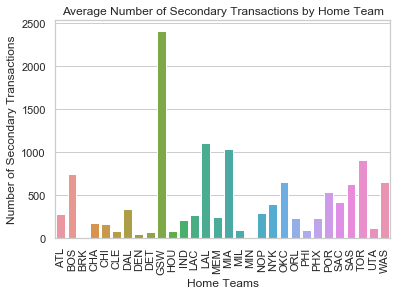

In [205]:
#calculate average number of secondary transactions by location
df_transaction_ave = df_all_games_updated.groupby(['Home'])['Num_Secondary_Transactions'].mean().reset_index()

sns.set(style="whitegrid")
ax = sns.barplot(x="Home", y="Num_Secondary_Transactions", data=df_transaction_ave)
ax.set_title('Average Number of Secondary Transactions by Home Team')
ax.set_ylabel('Number of Secondary Transactions')
ax.set_xlabel('Home Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

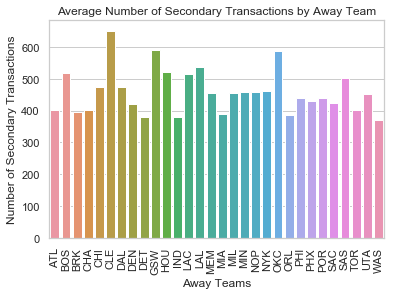

In [206]:
#calculate average number of secondary transactions by location
df_transaction_ave = df_all_games_updated.groupby(['Away'])['Num_Secondary_Transactions'].mean().reset_index()


sns.set(style="whitegrid")
ax = sns.barplot(x="Away", y="Num_Secondary_Transactions", data=df_transaction_ave)
ax.set_title('Average Number of Secondary Transactions by Away Team')
ax.set_ylabel('Number of Secondary Transactions')
ax.set_xlabel('Away Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

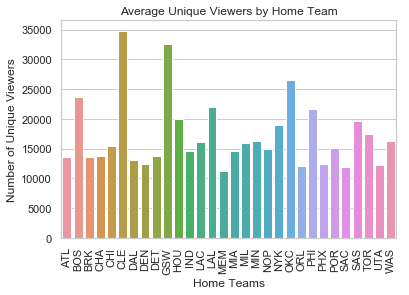

In [207]:
#calculate average number of secondary transactions by location
df_unique_viewers_ave = df_all_games_updated.groupby(['Home'])['Unique_Viewers'].mean().reset_index()


sns.set(style="whitegrid")
ax = sns.barplot(x="Home", y="Unique_Viewers", data=df_unique_viewers_ave)
ax.set_title('Average Unique Viewers by Home Team')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Home Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

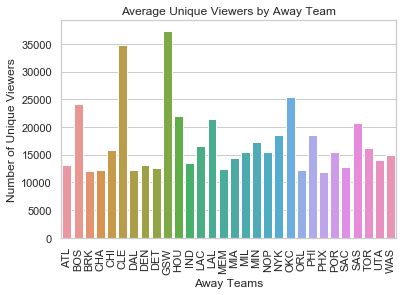

In [208]:
#calculate average number of secondary transactions by location
df_unique_viewers_ave = df_all_games_updated.groupby(['Away'])['Unique_Viewers'].mean().reset_index()


sns.set(style="whitegrid")
ax = sns.barplot(x="Away", y="Unique_Viewers", data=df_unique_viewers_ave)
ax.set_title('Average Unique Viewers by Away Team')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Away Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

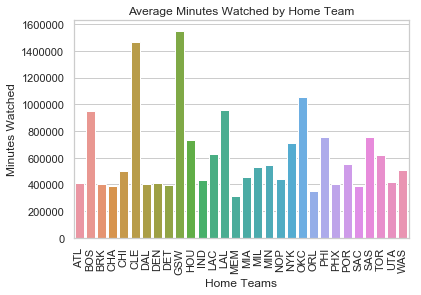

In [209]:
#calculate average number of secondary transactions by location
df_minutes_watched_ave = df_all_games_updated.groupby(['Home'])['Minutes_Watched'].mean().reset_index()


sns.set(style="whitegrid")
ax = sns.barplot(x="Home", y="Minutes_Watched", data=df_minutes_watched_ave)
ax.set_title('Average Minutes Watched by Home Team')
ax.set_ylabel('Minutes Watched')
ax.set_xlabel('Home Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

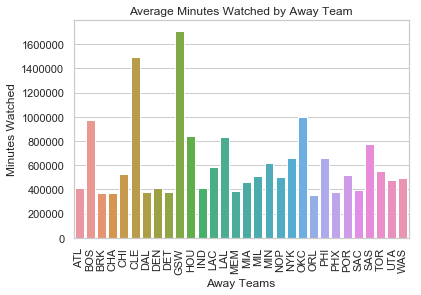

In [210]:
#calculate average number of secondary transactions by location
df_minutes_watched_ave = df_all_games_updated.groupby(['Away'])['Minutes_Watched'].mean().reset_index()

sns.set(style="whitegrid")
ax = sns.barplot(x="Away", y="Minutes_Watched", data=df_minutes_watched_ave)
ax.set_title('Average Minutes Watched by Away Team')
ax.set_ylabel('Minutes Watched')
ax.set_xlabel('Away Teams')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [211]:
#sum home and away teams social metrics from previous month

df_all_games_updated['gts_1'] = df_all_games_updated['Home_gts_1'] + df_all_games_updated['Away_gts_1']
df_all_games_updated['wp_pageviews_1'] = df_all_games_updated['Home_wp_pageviews_1'] + df_all_games_updated['Away_wp_pageviews_1']
df_all_games_updated['Followers_Facebook_1'] = df_all_games_updated['Home_Followers_Facebook_1'] + df_all_games_updated['Away_Followers_Facebook_1']
df_all_games_updated['Followers_Twitter_1'] = df_all_games_updated['Home_Followers_Twitter_1'] + df_all_games_updated['Away_Followers_Twitter_1']
df_all_games_updated['Followers_Instagram_1'] = df_all_games_updated['Home_Followers_Instagram_1'] + df_all_games_updated['Away_Followers_Instagram_1']
df_all_games_updated['Followers_Snapchat_1'] = df_all_games_updated['Home_Followers_Snapchat_1'] + df_all_games_updated['Away_Followers_Snapchat_1']
df_all_games_updated['Followers_Weibo_1'] = df_all_games_updated['Home_Followers_Weibo_1'] + df_all_games_updated['Away_Followers_Weibo_1']
df_all_games_updated['Engagements_Facebook_1'] = df_all_games_updated['Home_Engagements_Facebook_1'] + df_all_games_updated['Away_Engagements_Facebook_1']
df_all_games_updated['Engagements_Twitter_1'] = df_all_games_updated['Home_Engagements_Twitter_1'] + df_all_games_updated['Away_Engagements_Twitter_1']
df_all_games_updated['Engagements_Instagram_1'] = df_all_games_updated['Home_Engagements_Instagram_1'] + df_all_games_updated['Away_Engagements_Instagram_1']
df_all_games_updated['Impressions_Facebook_1'] = df_all_games_updated['Home_Impressions_Facebook_1'] + df_all_games_updated['Away_Impressions_Facebook_1']
df_all_games_updated['Impressions_Twitter_1'] = df_all_games_updated['Home_Impressions_Twitter_1'] + df_all_games_updated['Away_Impressions_Twitter_1']
df_all_games_updated['TTS_1'] = df_all_games_updated['Home_TTS_1'] + df_all_games_updated['Away_TTS_1']
df_all_games_updated['UNQ_1'] = df_all_games_updated['Home_UNQ_1'] + df_all_games_updated['Away_UNQ_1']


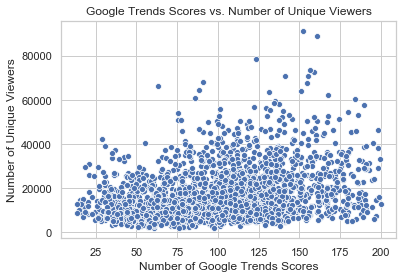

In [212]:
#Google Trends vs. Number of Unique Viewers
ax = sns.scatterplot(x="gts_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Google Trends Scores vs. Number of Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Google Trends Scores')
plt.show()

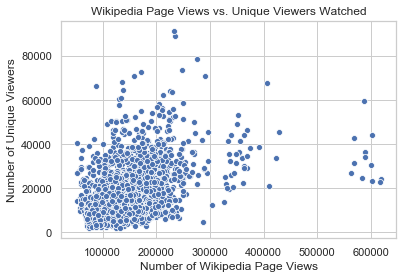

In [213]:
#Wikipedia Page Views vs. Number of Unique Viewers
ax = sns.scatterplot(x="wp_pageviews_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Wikipedia Page Views vs. Unique Viewers Watched')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Wikipedia Page Views')
plt.show()

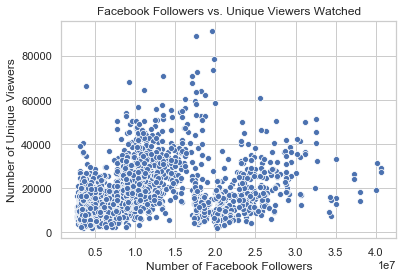

In [214]:
#Wikipedia Page Views vs. Number of Unique Viewers
ax = sns.scatterplot(x="Followers_Facebook_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Facebook Followers vs. Unique Viewers Watched')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Facebook Followers')
plt.show()

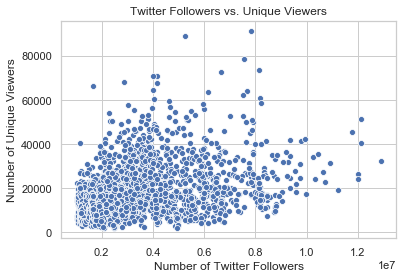

In [215]:
#Twitter Followers vs. Number of Unique Viewers
ax = sns.scatterplot(x="Followers_Twitter_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Twitter Followers vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Twitter Followers')
plt.show()

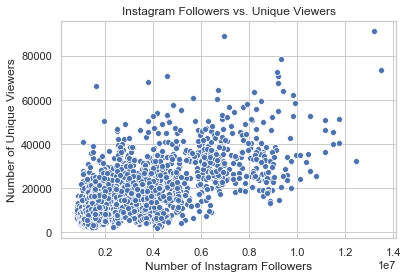

In [216]:
#Twitter Followers vs. Number of Unique Viewers
ax = sns.scatterplot(x="Followers_Instagram_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Instagram Followers vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Instagram Followers')
plt.show()

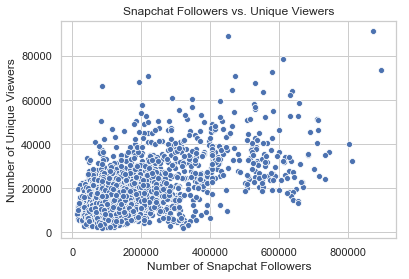

In [217]:
#Snapchat Followers vs. Number of Unique Viewers
ax = sns.scatterplot(x="Followers_Snapchat_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Snapchat Followers vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Snapchat Followers')
plt.show()

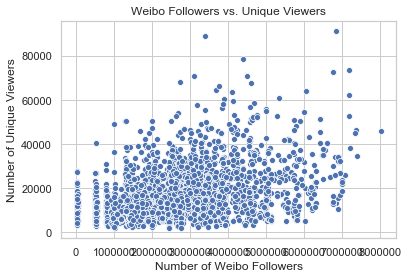

In [218]:
#Weibo Followers vs. Number of Unique Viewers
ax = sns.scatterplot(x="Followers_Weibo_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Weibo Followers vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Weibo Followers')
plt.show()

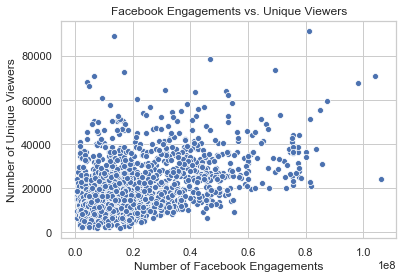

In [219]:
#Facebook Engagements vs. Number of Unique Viewers
ax = sns.scatterplot(x="Engagements_Facebook_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Facebook Engagements vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Facebook Engagements')
plt.show()

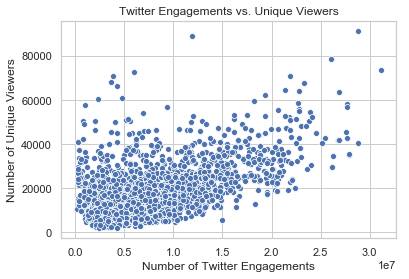

In [220]:

#Twitter Engagements vs. Number of Unique Viewers
ax = sns.scatterplot(x="Engagements_Twitter_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Twitter Engagements vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Twitter Engagements')
plt.show()

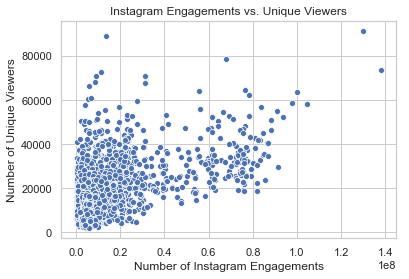

In [221]:
#Instagram Engagements vs. Number of Unique Viewers
ax = sns.scatterplot(x="Engagements_Instagram_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Instagram Engagements vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Instagram Engagements')
plt.show()

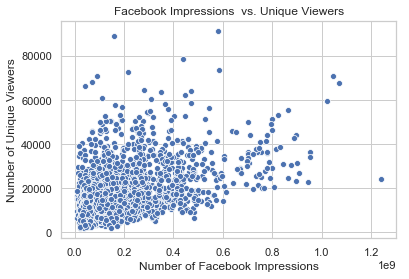

In [222]:
#Facebook Impressions vs. Number of Unique Viewers
ax = sns.scatterplot(x="Impressions_Facebook_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Facebook Impressions  vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Facebook Impressions')
plt.show()

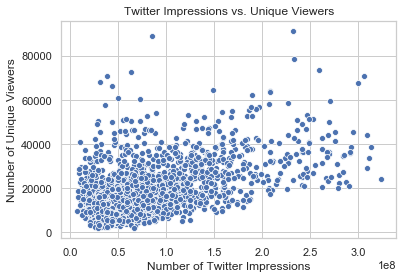

In [223]:
#Twitter Impressions vs. Number of Unique Viewers
ax = sns.scatterplot(x="Impressions_Twitter_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('Twitter Impressions vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of Twitter Impressions')
plt.show()

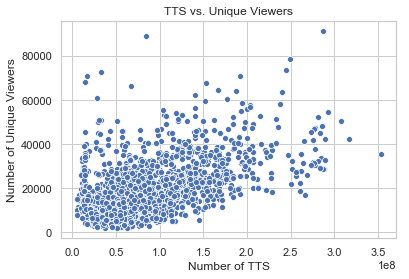

In [224]:
#TTS vs. Number of Unique Viewers
ax = sns.scatterplot(x="TTS_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('TTS vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of TTS')
plt.show()

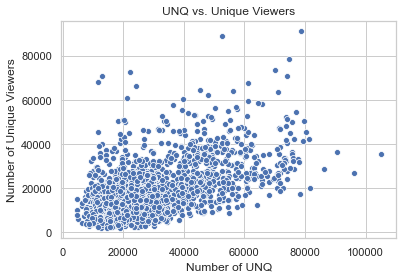

In [225]:
#UNQ vs. Number of Unique Viewers
ax = sns.scatterplot(x="UNQ_1", y="Unique_Viewers", data=df_all_games_updated)
ax.set_title('UNQ vs. Unique Viewers')
ax.set_ylabel('Number of Unique Viewers')
ax.set_xlabel('Number of UNQ')
plt.show()

In [226]:
np.corrcoef(df_all_games_updated.UNQ_1, df_all_games_updated.Unique_Viewers)[1][0]

0.56090669188600673

In [227]:
#removing null values
df_all_games_updated = df_all_games_updated[['gts_1',
 'wp_pageviews_1',
 'Followers_Facebook_1',
 'Followers_Twitter_1',
 'Followers_Instagram_1',
 'Followers_Snapchat_1',
 'Followers_Weibo_1',
 'Engagements_Facebook_1',
 'Engagements_Twitter_1',
 'Engagements_Instagram_1',
 'Impressions_Facebook_1',
 'Impressions_Twitter_1',
 'TTS_1',
 'UNQ_1',
 'Unique_Viewers',
 'Minutes_Watched',
 'Minutes_per_Viewer',
 'Num_Secondary_Transactions',
 'Avg_Markup_Over_Full_STM_Price']].dropna()

#only feature variables
df_features = df_all_games_updated[['gts_1',
 'wp_pageviews_1',
 'Followers_Facebook_1',
 'Followers_Twitter_1',
 'Followers_Instagram_1',
 'Followers_Snapchat_1',
 'Followers_Weibo_1',
 'Engagements_Facebook_1',
 'Engagements_Twitter_1',
 'Engagements_Instagram_1',
 'Impressions_Facebook_1',
 'Impressions_Twitter_1',
 'TTS_1',
 'UNQ_1']]

#only response variables
df_response = df_all_games_updated[[
 'Unique_Viewers',
 'Minutes_Watched',
 'Minutes_per_Viewer',
 'Num_Secondary_Transactions',
 'Avg_Markup_Over_Full_STM_Price']]

In [262]:
Minutes_Watched_List = []
Unique_Viewers_list = []
Minutes_per_Viewer_List = []
Num_Secondary_Transactions_list = []
Avg_Markup_Over_Full_STM_Price_List = []
Features_List = list(df_features.columns)

#generate feature correlation with minutes watched
for feature_column in df_features:
        corr_coefficient = round(np.corrcoef(df_features[feature_column], df_response['Minutes_Watched'])[1][0],2)
        Minutes_Watched_List.append(corr_coefficient)
        
#generate feature correlation with unique viewers
for feature_column in df_features:
        corr_coefficient = round(np.corrcoef(df_features[feature_column], df_response['Unique_Viewers'])[1][0],2)
        Unique_Viewers_list.append(corr_coefficient)
        
#generate feature correlation with minutes per viewer
for feature_column in df_features:
        corr_coefficient = round(np.corrcoef(df_features[feature_column], df_response['Minutes_per_Viewer'])[1][0],2)
        Minutes_per_Viewer_List.append(corr_coefficient)
        
#generate feature correlation with number of secondary transactions
for feature_column in df_features:
        corr_coefficient = round(np.corrcoef(df_features[feature_column], df_response['Num_Secondary_Transactions'])[1][0],2)
        Num_Secondary_Transactions_list.append(corr_coefficient)
        
        
#generate feature correlation with avg markup over full STM price
for feature_column in df_features:
        corr_coefficient = round(np.corrcoef(df_features[feature_column], df_response['Avg_Markup_Over_Full_STM_Price'])[1][0],2)
        Avg_Markup_Over_Full_STM_Price_List.append(corr_coefficient)
        


In [263]:
#generate coefficient dataframe
d = {'Features': Features_List, 'Minutes_per_Viewer': Minutes_per_Viewer_List, 'Num_Secondary_Transactions': Num_Secondary_Transactions_list, 'Avg_Markup_Over_Full_STM_Price': Avg_Markup_Over_Full_STM_Price_List, 'Minutes_Watched': Minutes_Watched_List, 'Unique_Viewers': Unique_Viewers_list}
df_coefficient = pd.DataFrame(data=d)
df_coefficient['Ave_Coor_Coefficient'] = df_coefficient[['Avg_Markup_Over_Full_STM_Price', 'Minutes_Watched', 'Minutes_per_Viewer','Num_Secondary_Transactions','Unique_Viewers']].mean(axis=1) #average correlation coefficient for potential repsonse variables
df_coefficient = df_coefficient[['Features', 'Ave_Coor_Coefficient', 'Avg_Markup_Over_Full_STM_Price', 'Minutes_Watched', 'Minutes_per_Viewer', 'Num_Secondary_Transactions', 'Unique_Viewers']]
df_coefficient = df_coefficient.sort_values('Ave_Coor_Coefficient', ascending=False) #sort by average correlation coefficient


In [264]:
df_coefficient.to_csv('correlation_coefficients.csv')

In [265]:
df_coefficient

,Features,Ave_Coor_Coefficient,Avg_Markup_Over_Full_STM_Price,Minutes_Watched,Minutes_per_Viewer,Num_Secondary_Transactions,Unique_Viewers
4,Followers_Instagram_1,0.600,0.56,0.67,0.59,0.53,0.65
5,Followers_Snapchat_1,0.574,0.54,0.64,0.59,0.50,0.60
11,Impressions_Twitter_1,0.554,0.57,0.57,0.53,0.55,0.55
8,Engagements_Twitter_1,0.548,0.54,0.60,0.58,0.46,0.56
13,UNQ_1,0.532,0.53,0.58,0.57,0.42,0.56
9,Engagements_Instagram_1,0.514,0.48,0.60,0.55,0.40,0.54
12,TTS_1,0.502,0.49,0.57,0.55,0.35,0.55
7,Engagements_Facebook_1,0.492,0.55,0.51,0.44,0.44,0.52
10,Impressions_Facebook_1,0.454,0.52,0.46,0.38,0.42,0.49
1,wp_pageviews_1,0.446,0.50,0.44,0.39,0.45,0.45
